In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

## Part 1: The Gravitational Potential of the Earth

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_22912\1022557942.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.where(np.isclose((x-xm)**2 + (y-ym)**2, 0), np.nan, -((G*M)/np.sqrt((x-xm)**2 + (y-ym)**2)))


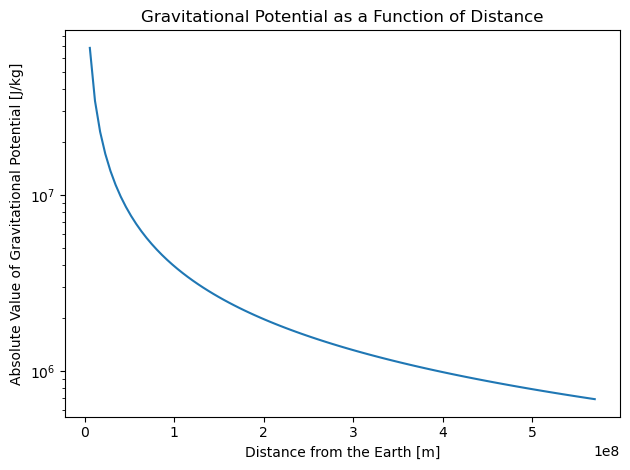

In [43]:
G = 6.67e-11 # m^3/kg*s^2
ym = 0 #m 
xm = 0  #m
x = np.linspace(0, 1.5*(3.8e8), 100) #m
y = 0 #m
M_earth = 5.9e24 # kg

def grav_pot(M, xm, ym, x, y):
    return np.where(np.isclose((x-xm)**2 + (y-ym)**2, 0), np.nan, -((G*M)/np.sqrt((x-xm)**2 + (y-ym)**2)))
    # this is done to protect the potential at zero with an np.nan

gravitational_potential = grav_pot(M_earth, xm, ym, x, y)

fig, ax = plt.subplots(1,1)
ax.plot(x, np.abs(gravitational_potential))
ax.set_yscale('log')
ax.set_xlabel('Distance from the Earth [m]')
ax.set_ylabel('Absolute Value of Gravitational Potential [J/kg]')
ax.set_title('Gravitational Potential as a Function of Distance')
fig.tight_layout()

plt.savefig('Gravitational Potential of Earth.png')

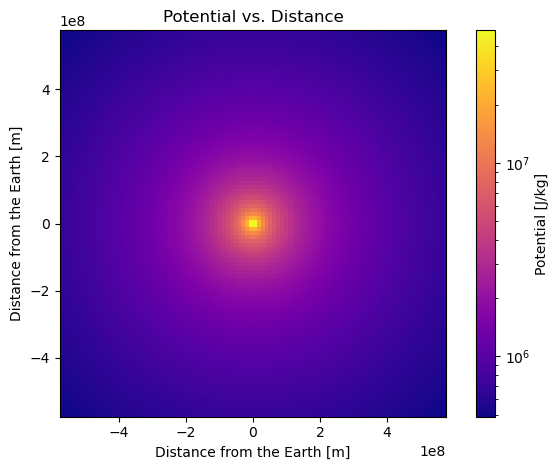

In [41]:
x_new = np.linspace(-1.5*(3.8e8), 1.5*(3.8e8), 100) #m
y_new = np.linspace(-1.5*(3.8e8), 1.5*(3.8e8), 100) #m
x_grid, y_grid = np.meshgrid(x_new, y_new)

gravitational_potential_earth = np.abs(grav_pot(M_earth, xm, ym, x_grid, y_grid))

fig2, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(x_grid, y_grid, gravitational_potential_earth, cmap = cm.plasma, norm ="log")
cbar = fig2.colorbar(mesh)
cbar.set_label('Potential [J/kg]')
ax2.set_aspect('equal')
ax2.set_xlabel('Distance from the Earth [m]')
ax2.set_ylabel('Distance from the Earth [m]')
ax2.set_title('Potential vs. Distance')
fig2.tight_layout()

plt.savefig('Mesh Gravitational Potential of Earth.png')

## Part 2: The Gravitational Potential of the Earth-Moon System

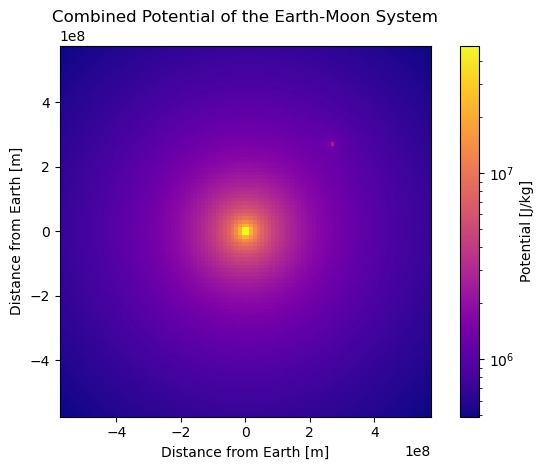

In [30]:
dist_earth_to_moon = 3.8e8 #m
M_moon = 5.9e22 #kg

x_moon = (dist_earth_to_moon)/np.sqrt(2)
y_moon = (dist_earth_to_moon)/np.sqrt(2)

gravitational_potential_earth = grav_pot(M_earth, xm, ym, x_grid, y_grid)
gravitational_potential_moon = grav_pot(M_moon, x_moon, y_moon, x_grid, y_grid)

combined_potential = np.abs(gravitational_potential_earth + gravitational_potential_moon)

fig3, ax3 = plt.subplots(1,1)
mesh2 = ax3.pcolormesh(x_grid, y_grid, combined_potential, cmap = cm.plasma, norm = 'log')
cbar2 = fig3.colorbar(mesh2)
cbar2.set_label('Potential [J/kg]')
ax3.set_aspect('equal')
ax3.set_xlabel('Distance from Earth [m]')
ax3.set_ylabel('Distance from Earth [m]')
ax3.set_title('Combined Potential of the Earth-Moon System')
fig3.tight_layout()

plt.savefig('Combined Potential Meshplot.png')

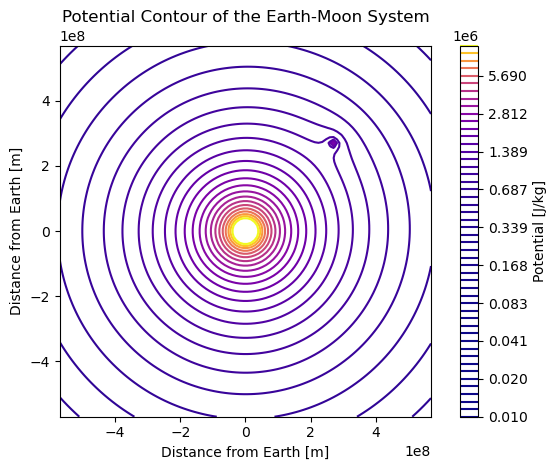

In [46]:
fig_contour, ax_contour = plt.subplots(1,1)

lvl = np.logspace(4,7,50)
contour = ax_contour.contour(x_grid, y_grid, combined_potential, levels = lvl, cmap = cm.plasma)
cbar3 = fig_contour.colorbar(contour)
cbar3.set_label('Potential [J/kg]')
ax_contour.set_aspect('equal')
ax_contour.set_title('Potential Contour of the Earth-Moon System')
ax_contour.set_xlabel('Distance from Earth [m]')
ax_contour.set_ylabel('Distance from Earth [m]')
fig_contour.tight_layout()

plt.savefig('Combined Potential Contour Plot.png')

## Part 3: The Gravitational Force Field of the Earth-Moon System

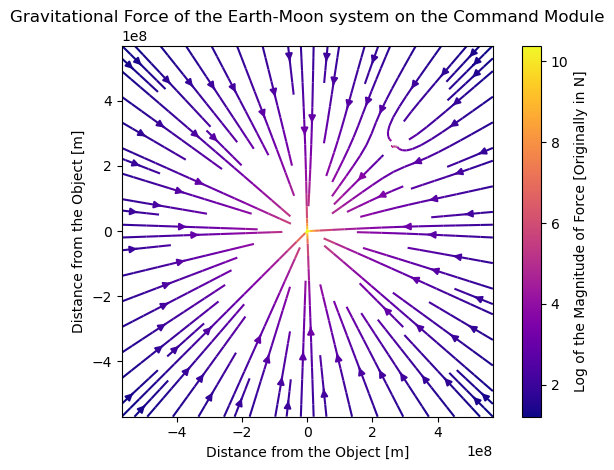

In [47]:
M_module = 5500 # kg
x1 = 0 #m
y1 = 0 #m 
x2 = np.linspace(0,3.8e8, 100) #m
y2 = 0 #m

def force(M1, m2, x1, y1, x2, y2):
    rx = (x2 - x1)
    ry = (y2 - y1)
    r_mag = np.sqrt(rx**2 + ry**2)
    rhatx = rx/r_mag
    rhaty = ry/r_mag
    Fx = np.where(np.isclose(rhatx, np.inf) is True, np.nan, -((G*M1*m2)/r_mag**2)*rhatx)
    Fy = np.where(np.isclose(rhaty, np.inf) is True, np.nan,-((G*M1*m2)/r_mag**2)*rhaty)
    return Fx, Fy

Fx_earth = force(M_module, M_earth, x1, y1, x_grid, y_grid)[0]
Fy_earth = force(M_module, M_earth, x1, y1, x_grid, y_grid)[1]
Fx_moon = force(M_module, M_moon, x_moon, y_moon, x_grid, y_grid)[0]
Fy_moon = force(M_module, M_moon, x_moon, y_moon, x_grid, y_grid)[1]

colors = np.log(np.hypot(Fx_earth + Fx_moon, Fy_earth + Fy_moon))

fig4, ax4 = plt.subplots(1,1)
stream = ax4.streamplot(x_grid, y_grid, Fx_earth + Fx_moon, Fy_earth + Fy_moon, color = colors, cmap = 'plasma')
cbar = fig4.colorbar(stream.lines, label = 'Log of the Magnitude of Force [Originally in N]')
ax4.set_title('Gravitational Force of the Earth-Moon system on the Command Module')
ax4.set_xlabel('Distance from the Object [m]')
ax4.set_ylabel('Distance from the Object [m]')
ax4.set_aspect('equal')
fig4.tight_layout()

plt.savefig('Gravitational Force.png')

## Part 4: Altitude of the Saturn V Rocket

In [58]:
m0 = 2.8e6 #kg
mf = 7.5e5 #kg
m_dot = 1.3e4 # kg/s

T = (m0 - mf)/m_dot # s
print(f'Total burn time {T} in seconds')

Total burn time 157.69230769230768 in seconds


In [59]:
ve = 2.4e3 # m/s 
g = 9.81 # m/s^2
t = np.linspace(0, T, 100)

def delta_v(t):
    m_t = m0 - m_dot*t
    m_t = np.where(m_t < mf, mf, m_t)
    v = ve*np.log(m0/m_t) - g*t
    return v

change_in_vel = delta_v(t) 
print(change_in_vel) # m/s

[   0.            2.18899902    4.51122495    6.96868548    9.56343401
   12.29757106   15.17324574   18.19265724   21.35805642   24.67174743
   28.13608939   31.75349818   35.52644825   39.45747455   43.54917451
   47.80421011   52.22531003   56.81527192   61.57696471   66.51333108
   71.62739001   76.9222394    82.40105892   88.06711282   93.92375305
   99.97442235  106.22265763  112.67209338  119.32646531  126.18961415
  133.26548963  140.55815464  148.07178957  155.81069691  163.77930607
  171.98217836  180.42401235  189.10964939  198.04407945  207.23244731
  216.68005897  226.39238853  236.37508528  246.63398134  257.17509957
  268.00466203  279.12909882  290.55505749  302.28941294  314.33927793
  326.71201413  339.41524393  352.45686287  365.84505285  379.58829615
  393.69539031  408.17546396  423.03799365  438.29282173  453.95017545
  470.0206873   486.51541666  503.44587302  520.82404071  538.6624054
  556.97398244  575.77234725  595.07166797  614.88674041  635.23302572
  656.1

In [60]:
from scipy.integrate import quad 
h,err = quad(delta_v, 0, T)
print(f'The altitude of the rocket at the end of the burn is {h} with an error of {err} in meters')

comparison_2 = 70000/h
print(comparison_2)

The altitude of the rocket at the end of the burn is 74093.98013366401 with an error of 5.848811185394151e-08 in meters
0.9447461166713065
